In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

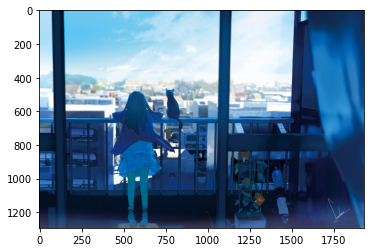

In [3]:
img_path = './images/681360.jpg'
img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

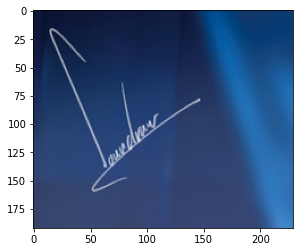

In [4]:
rect_img = img[1100:img.shape[0], 1700:img.shape[1]]
plt.imshow(rect_img)
plt.show()

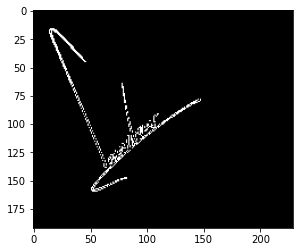

In [4]:
min_h = 0
min_s = 0
min_v = 0
max_h = 180
max_s = 115
max_v = 190

rect = rect_img
rect = cv.cvtColor(rect, cv.COLOR_RGB2HSV)
mask = cv.inRange(rect, (min_h, min_s, min_v), (max_h, max_s, max_v))
rect = cv.cvtColor(rect, cv.COLOR_HSV2RGB)
# rect_theshold = cv.cvtColor(rect_theshold, cv.COLOR_HSV2RGB)
plt.imshow(mask, cmap='gray')
plt.show()

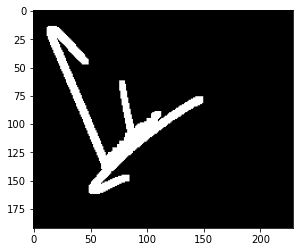

In [5]:
mask_kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
mask_output = cv.dilate(mask, mask_kernel, 4)
plt.imshow(mask_output,cmap='gray')
plt.show()


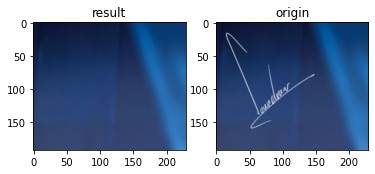

In [6]:
test_rect = cv.inpaint(rect_img, mask_output, 3, cv.INPAINT_TELEA)
plt.subplot(1, 2, 1)
plt.title('result')
plt.imshow(test_rect)
plt.subplot(1, 2, 2)
plt.title('origin')
plt.imshow(rect_img)
plt.show()


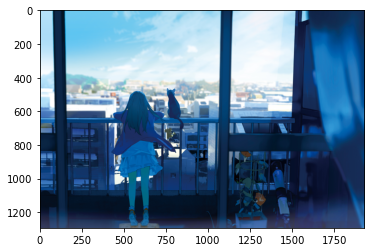

In [7]:
img[1100:img.shape[0], 1700:img.shape[1]] = test_rect
plt.imshow(img)
plt.show()

In [26]:
img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
cv.imwrite('output.jpg', img)


True

## 另外一种做法

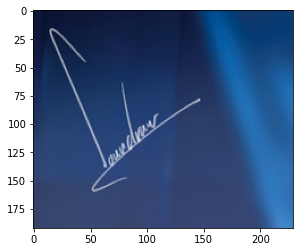

In [18]:
another = rect_img
plt.imshow(another)
plt.show()

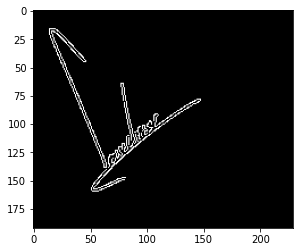

In [19]:
output = cv.Canny(another, 100, 200)

# output = cv.bitwise_not(output)
plt.imshow(output, cmap='gray')
plt.show()

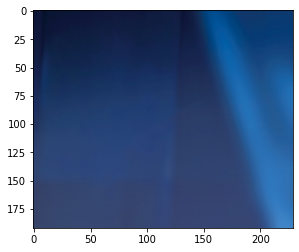

In [21]:
outout_img = cv.inpaint(another, cv.dilate(output, cv.getStructuringElement(cv.MORPH_RECT, (5, 5)), 3), 3, cv.INPAINT_TELEA)
plt.imshow(outout_img)
plt.show()

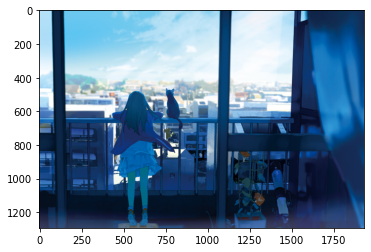

In [23]:
img[1100:img.shape[0], 1700:img.shape[1]] = outout_img
plt.imshow(img)
plt.show()